In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import seaborn as sns

# Linear Regressions and Used Cars 
car_data.csv holds information about the retail price of used 2005 GM cars.

In [2]:
data = pd.read_csv('car_data.csv')
data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


## Part 1

#### Task 1.1 Find the linear regression equation for mileage vs. price

Assign variables and separate test and training data.

In [3]:
X = data['Mileage'].to_frame()
y = data['Price']
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=150)

I found that the simple linear regression model.

In [4]:
m_p = LinearRegression()
m_p.fit(train_X, train_y)

/Users/kathrynjackson/Code/homework/car_worth_linear_regression/.direnv/python-3.5.1/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

I plotted the data and the linear regression model.

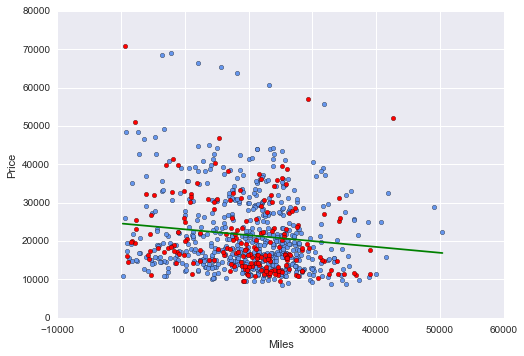

In [5]:
new_df = pd.DataFrame({'Mileage': [data['Mileage'].max(), data['Mileage'].min()]})

plt.scatter(train_X, train_y, c='cornflowerblue')
plt.scatter(test_X, test_y, c='r')
plt.xlabel('Miles')
plt.ylabel('Price')
plt.plot(new_df, m_p.predict(new_df), c='g')
plt.show()

The correlation of this one degree linear regression is not so hot.
The coefficient of determination is 0.0197.

In [6]:
m_p.score(data['Mileage'].to_frame(), data['Price'])

0.019721814880161892

So, I made more complex models.

#### Task 1.1 Find the linear regression equation for mileage vs. price
#### Task 1.2 Chart original data and equation
#### Task 1.3 Find the equation's *R<sup>2</sup>* score

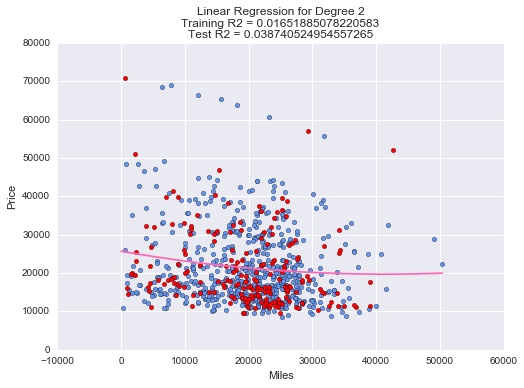

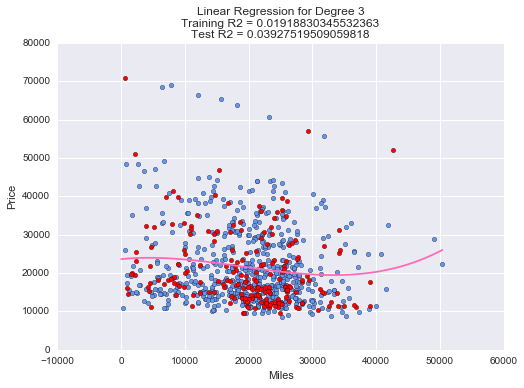

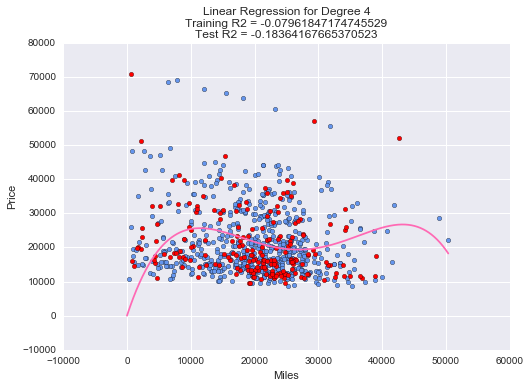

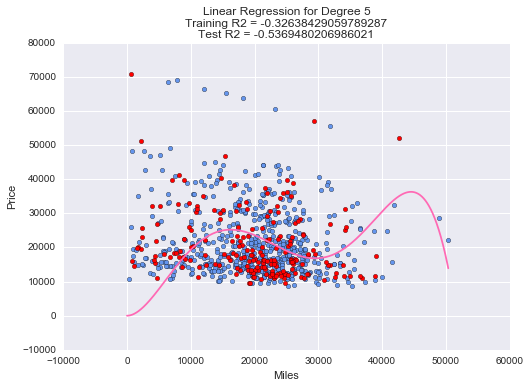

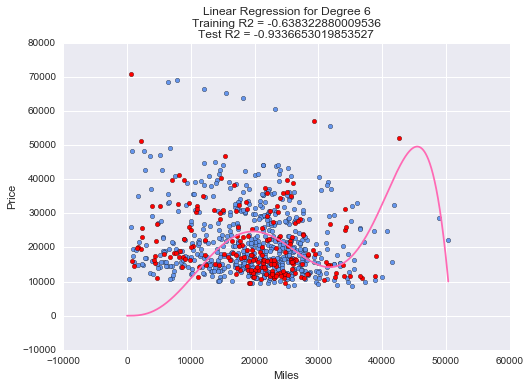

In [7]:
for degree in range(2, 7):
    regr = Pipeline([
            ('poly', PolynomialFeatures(degree=degree)),
            ('linear', LinearRegression(fit_intercept=False))])
    regr.fit(train_X, train_y)
    
    plt.scatter(train_X, train_y, c='cornflowerblue')
    plt.scatter(test_X, test_y, c='r')
    plt.xlabel('Miles')
    plt.ylabel('Price')
    plt.title('Linear Regression for Degree {}\nTraining R2 = {}\nTest R2 = {}'.format(degree, regr.score(train_X, train_y), regr.score(test_X, test_y)))
    plt.plot(regr.predict([[j] for j in range(data['Mileage'].max())]), color='hotpink')
    plt.show()

It turns out a three degree linear resgression is the best fit for this data, but it is still not very good, only having a 0.39 R<sup>2</sup> score.

## Part 2
#### Task 2.1 Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [8]:
feature_cols = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
X = data[feature_cols]
y = data['Price']
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=80)

seven_regr = LinearRegression()
seven_regr.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Task 2.2 Find the R<sup>2</sup> score for the equation.

In [9]:
print(seven_regr.score(X, y))

0.444927671356


The R<sup>2</sup> score for this data is 0.44. This is not a very good fit.

#### Task 2.3 Find the combination of the factors that is the best predictor for price.

In [10]:
def get_best_predictor_set(feature_cols, size):
    groups = list(itertools.combinations(feature_cols, size))

    best_r2 = 0
    best_pair = ''
    
    for group in groups:
        X = data[[a for a in group]]
        y = data['Price']
        train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=80)

        regr = LinearRegression()
        regr.fit(train_X, train_y)
        r2 = regr.score(test_X, test_y)
        
        if regr.score(test_X, test_y) > best_r2:
            best_r2 = r2
            best_pair = group
            
    return best_pair, best_r2

In [11]:
best_pair, best_r2 = get_best_predictor_set(feature_cols, 2)
print(best_pair, best_r2)
best_triple_set, best_r2 = get_best_predictor_set(feature_cols, 3)
print(best_triple_set, best_r2)
best_quad_set, best_r2 = get_best_predictor_set(feature_cols, 4)
print(best_quad_set, best_r2)
best_5_set, best_r2 = get_best_predictor_set(feature_cols, 5)
print(best_5_set, best_r2)
best_6_set, best_r2 = get_best_predictor_set(feature_cols, 6)
print(best_6_set, best_r2)
best_7_set, best_r2 = get_best_predictor_set(feature_cols, 7)
print(best_7_set, best_r2)

('Cylinder', 'Cruise') 0.386823082281
('Cylinder', 'Cruise', 'Leather') 0.409091776776
('Cylinder', 'Cruise', 'Sound', 'Leather') 0.424035557457
('Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather') 0.429550293786
('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather') 0.431363660234
('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather') 0.432050439905


The best pair of features to predict price is Cylinder and Cruise, but at 0.387 the correlation is still not very strong. As a rule, the more information you add, the more the machine learns. Therefore, the best predictor of price is still a combination of all 7 of these variables.

## Part 3
#### Task 3.1 Figure out how to use make, model, and body type as features using dummy variables.
I used the pandas method .get_dummies to create binary variables for the categorical features Make, Model, and Type.

In [13]:
catg_cols = ['Make', 'Model', 'Type']
binary_cats = pd.get_dummies(data[catg_cols])
binary_cats = binary_cats.join(data)
binary_cats.drop(['Make', 'Model', 'Trim', 'Type'], 1, inplace=True)
binary_cats.columns

Index(['Make_Buick', 'Make_Cadillac', 'Make_Chevrolet', 'Make_Pontiac',
       'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD', 'Model_9_3',
       'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO',
       'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier',
       'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am',
       'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series',
       'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire',
       'Model_Vibe', 'Model_XLR-V8', 'Type_Convertible', 'Type_Coupe',
       'Type_Hatchback', 'Type_Sedan', 'Type_Wagon', 'Price', 'Mileage',
       'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

### Multiple Linear Regression for all featrues, including binary variables

In [14]:
features = ['Make_Buick', 'Make_Cadillac', 'Make_Chevrolet', 'Make_Pontiac',
       'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD', 'Model_9_3',
       'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO',
       'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier',
       'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am',
       'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series',
       'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire',
       'Model_Vibe', 'Model_XLR-V8', 'Type_Convertible', 'Type_Coupe',
       'Type_Hatchback', 'Type_Sedan', 'Type_Wagon', 'Mileage', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
X = binary_cats[features]
y = binary_cats['Price']
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=250)

holy_crap_regr = LinearRegression()
holy_crap_regr.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
holy_crap_regr.score(test_X, test_y)

0.97574524719459699

This score is very good. Almost too good. So I spent the rest of the night trying to figure out what was happening, and which features were impacting the regression the most.

In [16]:
new_df = pd.DataFrame({key: [binary_cats[key].max(), binary_cats[key].min()] for key in features})
new_df

,Cruise,Cylinder,Doors,Leather,Liter,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,...,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Sound,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,1,8,4,1,6.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,1.0,1.0
1,0,4,2,0,1.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0


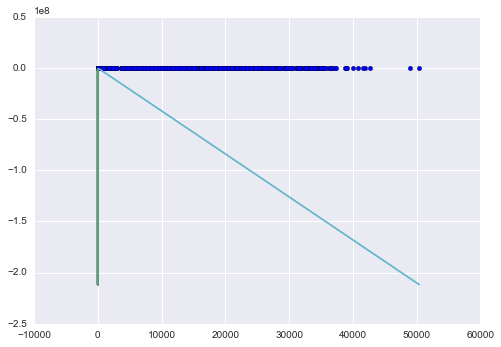

In [17]:
for feature in X:
    plt.scatter(binary_cats[feature], y)
plt.plot(new_df, holy_crap_regr.predict(new_df))
plt.show()
# plt.ylim(ymin=0, ymax=80000)

In [18]:
baby_b = binary_cats.iloc[100].to_frame()
baby_b.drop('Price', inplace=True)
baby_b = baby_b.transpose()
holy_crap_regr.predict(baby_b)

array([ 36802.4339158])

This linear regression looks crazy when it's plotted, but it's R<sup>2</sup> is 0.97 and it can pretty closely predict the price of a car with a full data frame of features.

In [19]:
def get_best_predictor_set_now(feature_cols, size):
    groups = list(itertools.combinations(feature_cols, size))

    best_r2 = 0
    best_pair = ''
    
    for group in groups:
        X = binary_cats[[a for a in group]]
        y = binary_cats['Price']
        train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=80)

        regr = LinearRegression()
        regr.fit(train_X, train_y)
        r2 = regr.score(test_X, test_y)
        
        if regr.score(test_X, test_y) > best_r2:
            best_r2 = r2
            best_pair = group
            
    return best_pair, best_r2

In [20]:
makes = ['Make_Buick', 'Make_Cadillac', 'Make_Chevrolet', 'Make_Pontiac',
       'Make_SAAB', 'Make_Saturn']
print(get_best_predictor_set_now(makes, 1))
print(get_best_predictor_set_now(makes, 2))
print(get_best_predictor_set_now(makes, 3))
print(get_best_predictor_set_now(makes, 4))
print(get_best_predictor_set_now(makes, 5))
print(get_best_predictor_set_now(makes, 6))

(('Make_Cadillac',), 0.37741449535359761)
(('Make_Cadillac', 'Make_SAAB'), 0.56345478639620961)
(('Make_Buick', 'Make_Cadillac', 'Make_SAAB'), 0.57969806370701416)
(('Make_Buick', 'Make_Cadillac', 'Make_SAAB', 'Make_Saturn'), 0.58511619693394645)
(('Make_Buick', 'Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB', 'Make_Saturn'), 0.58486515091602198)
(('Make_Buick', 'Make_Cadillac', 'Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB', 'Make_Saturn'), 0.5850610154986553)


## Multiple Linear Regressions for Make 
These regressions are good at predicting prices for cars with the same make.

### Buick Linear Regression

In [21]:
Buick_df = binary_cats[binary_cats['Make_Buick'] == 1]
Buick_df = Buick_df.replace(0.0, np.nan)
Buick_df = Buick_df.dropna(1, how='all')
Buick_df = Buick_df.replace(np.nan, 0.0)
Buick_df.head()

,Make_Buick,Model_Century,Model_Lacrosse,Model_Lesabre,Model_Park Avenue,Type_Sedan,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,1.0,1.0,0.0,0.0,0.0,1.0,17314.103129,8221,6,3.1,4,1,1.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,17542.036083,9135,6,3.1,4,1,1.0,0.0
2,1.0,1.0,0.0,0.0,0.0,1.0,16218.847862,13196,6,3.1,4,1,1.0,0.0
3,1.0,1.0,0.0,0.0,0.0,1.0,16336.913140,16342,6,3.1,4,1,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,1.0,16339.170324,19832,6,3.1,4,1,0.0,1.0


In [22]:
feature_cols = [x for x in Buick_df.columns if x != 'Price']
X = Buick_df[feature_cols]
y = Buick_df['Price']
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=100)

regr = LinearRegression()
regr.fit(train_X, train_y)
regr.score(test_X, test_y)

0.78359391996841232

### Cadillac Linear Regression

In [23]:
Cad_df = binary_cats[binary_cats['Make_Cadillac'] == 1]
Cad_df = Cad_df.replace(0.0, np.nan)
Cad_df = Cad_df.dropna(1, how='all')
Cad_df = Cad_df.replace(np.nan, 0.0)
Cad_df.head()

,Make_Cadillac,Model_CST-V,Model_CTS,Model_Deville,Model_STS-V6,Model_STS-V8,Model_XLR-V8,Type_Convertible,Type_Sedan,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
80,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,51154.047216,2202,8,5.7,4,1,1.0,1
81,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,49248.158967,6685,8,5.7,4,1,0.0,1
82,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,46747.673270,15343,8,5.7,4,1,1.0,1
83,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,44130.617055,21341,8,5.7,4,1,0.0,1
84,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,44084.914212,21367,8,5.7,4,1,1.0,1


In [24]:
feature_cols = [x for x in Cad_df.columns if x != 'Price']
X = Cad_df[feature_cols]
y = Cad_df['Price']
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=100)

regr = LinearRegression()
regr.fit(train_X, train_y)
regr.score(test_X, test_y)

0.93663085872277241

### SAAB Linear Regression

In [25]:
SAAB_df = binary_cats[binary_cats['Make_SAAB'] == 1]
SAAB_df = SAAB_df.replace(0.0, np.nan)
SAAB_df = SAAB_df.dropna(1, how='all')
SAAB_df = SAAB_df.replace(np.nan, 0.0)
SAAB_df.head()

,Make_SAAB,Model_9-2X AWD,Model_9_3,Model_9_3 HO,Model_9_5,Model_9_5 HO,Type_Convertible,Type_Sedan,Type_Wagon,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
630,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,35622.139495,10340,4,2.0,2,1,1.0,0.0
631,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,34819.297122,12251,4,2.0,2,1,0.0,0.0
632,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,34355.003728,17711,4,2.0,2,1,1.0,0.0
633,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,32737.084546,19112,4,2.0,2,1,1.0,1.0
634,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,33540.536105,20925,4,2.0,2,1,0.0,1.0


In [26]:
feature_cols = [x for x in SAAB_df.columns if x != 'Price']
X = SAAB_df[feature_cols]
y = SAAB_df['Price']
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=100)

regr = LinearRegression()
regr.fit(train_X, train_y)
regr.score(test_X, test_y)

0.82375113755545581

### Saturn Linear Regression

In [27]:
Sat_df = binary_cats[binary_cats['Make_Saturn'] == 1]
Sat_df = Sat_df.replace(0.0, np.nan)
Sat_df = Sat_df.dropna(1, how='all')
Sat_df = Sat_df.replace(np.nan, 0.0)
Sat_df.head()

,Make_Saturn,Model_Ion,Model_L Series,Type_Coupe,Type_Sedan,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
744,1.0,1.0,0.0,1.0,0.0,16916.869535,2879,4,2.2,2,1.0,0.0,1.0
745,1.0,1.0,0.0,1.0,0.0,15639.036743,8507,4,2.2,2,1.0,0.0,0.0
746,1.0,1.0,0.0,1.0,0.0,16256.236168,10555,4,2.2,2,0.0,0.0,1.0
747,1.0,1.0,0.0,1.0,0.0,15395.010874,12920,4,2.2,2,1.0,0.0,0.0
748,1.0,1.0,0.0,1.0,0.0,14881.955446,14376,4,2.2,2,0.0,0.0,0.0


In [28]:
feature_cols = [x for x in Sat_df.columns if x != 'Price']
X = Sat_df[feature_cols]
y = Sat_df['Price']
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=100)

regr = LinearRegression()
regr.fit(train_X, train_y)
regr.score(test_X, test_y)

0.84723095415146554

### Type Linear Regression

In [29]:
feature_cols = ['Type_Coupe', 'Type_Sedan', 'Type_Wagon']
X = binary_cats[feature_cols]
y = binary_cats['Price']
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=99)

regr = LinearRegression()
regr.fit(train_X, train_y)
regr.score(test_X, test_y)

0.059347423244186299

Looks like type is not a good indicator of price.

In [30]:
Cad_df = binary_cats[binary_cats['Make_Cadillac'] == 1]
Cad_df.head()

,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9-2X AWD,Model_9_3,Model_9_3 HO,Model_9_5,...,Type_Sedan,Type_Wagon,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
80,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,51154.047216,2202,8,5.7,4,1,1,1
81,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,49248.158967,6685,8,5.7,4,1,0,1
82,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,46747.673270,15343,8,5.7,4,1,1,1
83,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,44130.617055,21341,8,5.7,4,1,0,1
84,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,44084.914212,21367,8,5.7,4,1,1,1


In [31]:
feature_cols = [x for x in Cad_df.columns if x != 'Price']
X = Cad_df[feature_cols]
y = Cad_df['Price']
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=100)

regr = LinearRegression()
regr.fit(train_X, train_y)
print(regr.score(test_X, test_y))
print(regr.score(binary_cats[[x for x in binary_cats.columns if x != 'Price']], binary_cats['Price']))

0.936630858723
-2.23320286716


The make Cadillac has a strong positive correlation with price and trains well for predictions of other Cadillacs.
But on its own, it is a terrible predictor of the price of any other GM make car.

## Simple Linear Regression for all data except Pontiac and Chevrolet

In [32]:
feature_cols_no_Chev_Pont = ['Make_Buick', 'Make_Cadillac',
       'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD', 'Model_9_3',
       'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO',
       'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier',
       'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am',
       'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series',
       'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire',
       'Model_Vibe', 'Model_XLR-V8', 'Type_Convertible', 'Type_Coupe',
       'Type_Hatchback', 'Type_Sedan', 'Type_Wagon', 'Mileage',
       'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
X = binary_cats[feature_cols_no_Chev_Pont]
y = binary_cats['Price']
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=150)

regr = LinearRegression()
regr.fit(train_X, train_y)
print(regr.score(test_X, test_y))

0.976973775962


This model also looks very good, but it would not be good at predicting prices for Pontiacs and Chevrolets.

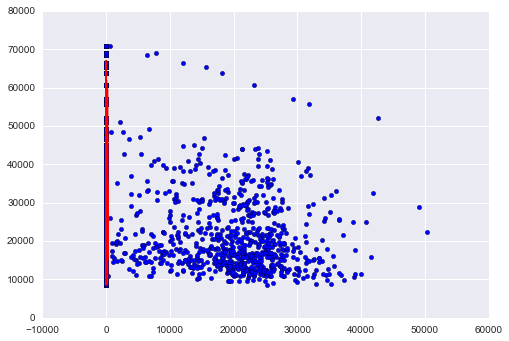

In [33]:
for X in feature_cols_no_Chev_Pont:
    plt.scatter(binary_cats[X], binary_cats['Price'])
plt.plot(regr.predict(test_X), c='r')
plt.show()

In [34]:
eature_cols_no_Chev_Pont = ['Make_Buick', 'Make_Cadillac',
       'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD', 'Model_9_3',
       'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO',
       'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier',
       'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am',
       'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series',
       'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire',
       'Model_Vibe', 'Model_XLR-V8', 'Type_Convertible', 'Type_Coupe',
       'Type_Hatchback', 'Type_Sedan', 'Type_Wagon', 'Mileage',
       'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
X = binary_cats[feature_cols_no_Chev_Pont]
y = binary_cats['Price']
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=150)

for degree in [2, 3]:
    regr = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', LinearRegression(fit_intercept=False))])
    regr.fit(train_X, train_y)
    print("degree = {} r2 = {}".format(degree, regr.score(test_X, test_y)))

degree = 2 r2 = -8.090668887747983
degree = 3 r2 = 0.9471322365380627


I tried to calculate polynomial regression for the large binary data set, but the computer would not do more than 3 degrees before getting hung up. I don't know a simple or useful way to plot these. The r2 score is for degree 3 is good, but still not as good as the single degree score. Perhaps the data is thrown off by having too many binary variables?